In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

np.seterr(all="ignore")
from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback
silence_warnings()
import warnings
warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

Welcome to JupyROOT 6.24/06


12:03:57 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=904940;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=448782;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=887589;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=462502;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

12:03:58 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=745447;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=989792;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

12:03:59 INFO      Starting 3ML!                                                                     ]8;id=698078;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=202113;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=942121;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=401726;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=826610;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=76394;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=137529;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=507263;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

12:04:00 WARNING   Multinest minimizer not available                                           ]8;id=632774;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=368607;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=527641;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=320083;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

12:04:01 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=862131;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=484384;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=42746;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=218612;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=300603;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=31921;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

12:04:02 WARNING   No fermitools installed                                              ]8;id=81569;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=24134;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Yourlib init successful!!!


In [ ]:
# you can do some change about the lib and reload it any time.
reload(my)


WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



12:04:50 INFO      Creating singleton for                                                            ]8;id=701882;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=33757;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#41\41]8;;\
                  /home/lhaaso/caowy/Public/3MLWCDAv0.9/Standard/src/../../data/DR_ihep_MK2.root                   

12:04:55 INFO      Region of Interest:                                                                   ]8;id=525884;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=996098;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#271\271]8;;\

         INFO      -------------------                                                                   ]8;id=232689;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=836646;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#272\272]8;;\

         INFO      HealpixConeROI: Center (R.A., Dec) = (83.630, 22.020), data radius =      ]8;id=750447;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_cone_roi.py\healpix_cone_roi.py]8;;\:]8;id=756552;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_cone_roi.py#87\87]8;;\
                  5.000 deg, model radius: 8.000 deg                                                               

         INFO                                                                                            ]8;id=259379;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=982650;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#275\275]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=498417;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=690534;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#276\276]8;;\

         INFO      --------------------                                                                  ]8;id=338029;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=772354;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#277\277]8;;\

         INFO      Width x height: 96 x 96 px                                                            ]8;id=619561;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=816309;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#279\279]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=828442;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=727303;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#281\281]8;;\

         INFO                                                                                            ]8;id=391410;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=685079;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#283\283]8;;\

         INFO      Response:                                                                             ]8;id=484471;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=984493;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#284\284]8;;\

         INFO      ---------                                                                             ]8;id=175535;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=203703;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#285\285]8;;\

         INFO      Response file:                                                                   ]8;id=222807;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=700598;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /home/lhaaso/caowy/Public/3MLWCDAv0.9/Standard/src/../../data/DR_ihep_MK2.root                   

         INFO      Number of dec bins: 110                                                          ]8;id=165387;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=350080;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=362674;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=321754;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=408523;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=462187;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#289\289]8;;\

         INFO      Map Tree:                                                                             ]8;id=687472;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=578779;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#290\290]8;;\

         INFO      ----------                                                                            ]8;id=539708;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=505515;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#291\291]8;;\

,Bin,Nside,Scheme,Obs counts,Bkg counts,obs/bkg,Pixels in ROI,Area (deg^2)
0,0,1024,RING,14079578.0,1.398376e+07,1.006852,23950,78.519855
1,1,1024,RING,6973954.0,6.879985e+06,1.013658,23950,78.519855
2,2,1024,RING,1182007.0,1.151274e+06,1.026695,23950,78.519855
3,3,1024,RING,504982.0,4.846976e+05,1.041850,23950,78.519855
4,4,1024,RING,136805.0,1.291262e+05,1.059467,23950,78.519855
5,5,1024,RING,35187.0,3.241292e+04,1.085586,23950,78.519855


         INFO      This Map Tree contains 784.448 transits in the first bin                         ]8;id=627462;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=650949;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.30 Mb                                                         ]8;id=101992;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=517541;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=389402;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=727026;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#295\295]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=966645;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=369246;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      -------------------------------                                                       ]8;id=942890;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=837704;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=359422;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=179267;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

Error in <TTreeFormula::Compile>:  Bad numerical expression : "name"


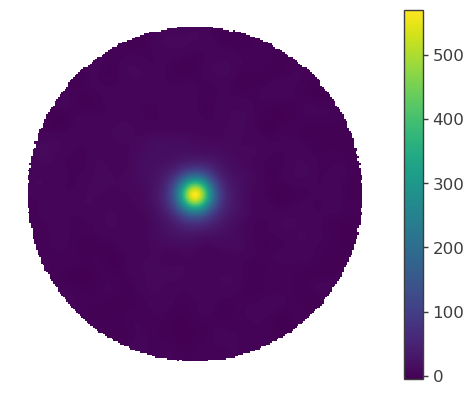

In [2]:
#####   Data Initialize

# maptree = "../../data/gcd_new.root"
# response = "../../data/WCDA_DR_psf.root"

maptree = "../../data/20210305_20230731_ihep_goodlist.root"
response = "../../data/DR_ihep_MK2.root"

region_name="Crab"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')
ra_crab, dec_crab = 83.63,22.02
ra1,dec1=ra_crab, dec_crab

data_radius = 5.0
model_radius = 8.0
roi=HealpixConeROI(ra=ra1,dec=dec1,data_radius=data_radius,model_radius=model_radius)  
WCDA = HAL("WCDA", maptree, response, roi, flat_sky_pixels_size=0.17)

#####   Data Situation
%matplotlib inline
WCDA.set_active_measurements(0, 5)
WCDA.display()

fig = WCDA.display_stacked_image(smoothing_kernel_sigma=0.25)
fig.show()
fig.savefig(f"../res/{region_name}/counts_all.png",dpi=300)

In [3]:
Modelname="1pt"  # Name your model now to facilitate the creation of record folders by the program.
if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
    os.system(f'mkdir ../res/{region_name}/{Modelname}/')


#Without extended parameter settings, it's a point source. When you set the corresponding extension, it becomes the respective source.
crab = my.setsorce("crab",ra1,dec1, fitrange=0.5,
                indexb=(-10,-1),pf=True, kb=(1e-14, 1e-8),
                )

lm = Model(crab) #,Diffuse , pt1, pt2, pt3

with open(f'../res/{region_name}/{Modelname}/Model_init.txt', 'w') as f:
    for key, value in lm.parameters.items():
        f.write(f'{key}: {value}\n')

lm.display(complete=True)

Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (4):
--------------------

                                   value min_value max_value            unit
crab.position.ra                   83.63     83.13     84.13             deg
crab.position.dec                  22.02     21.52     22.52             deg
crab.spectrum.main.Powerlaw.K        0.0       0.0       0.0  keV-1 s-1 cm-2
crab.spectrum.main.Powerlaw.index   -2.6     -10.0      -1.0                

Fixed parameters (1):
---------------------

                                        value min_value max_value unit
crab.spectrum.main.Powerlaw.piv  3000000000.0      None      None  keV

Properties (0):
--------------------

(none)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

12:07:40 INFO      set the minimizer to minuit                                             ]8;id=125681;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=177076;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=444799;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=297879;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
crab.position.ra,(8.36292 +/- 0.00015) x 10,deg
crab.position.dec,(2.20033 +/- 0.00013) x 10,deg
crab.spectrum.main.Powerlaw.K,(2.176 +/- 0.009) x 10^-21,1 / (cm2 keV s)
crab.spectrum.main.Powerlaw.index,-2.626 +/- 0.005,


Correlation matrix:

1.00,0.01,-0.00,0.01
0.01,1.00,0.01,0.01
-0.00,0.01,1.00,0.14
0.01,0.01,0.14,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,38080.67334
total,38080.67334


Values of statistical measures:

,statistical measures
AIC,76169.346959
BIC,76208.848613


Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

,value,negative_error,positive_error,error,unit
crab.position.ra,8.362917e+01,-1.488803e-03,1.494657e-03,1.491730e-03,deg
crab.position.dec,2.200333e+01,-1.249709e-03,1.250989e-03,1.250349e-03,deg
crab.spectrum.main.Powerlaw.K,2.175551e-21,-8.715183e-24,8.886143e-24,8.800663e-24,1 / (cm2 keV s)
crab.spectrum.main.Powerlaw.index,-2.625925e+00,-4.809831e-03,4.730762e-03,4.770297e-03,


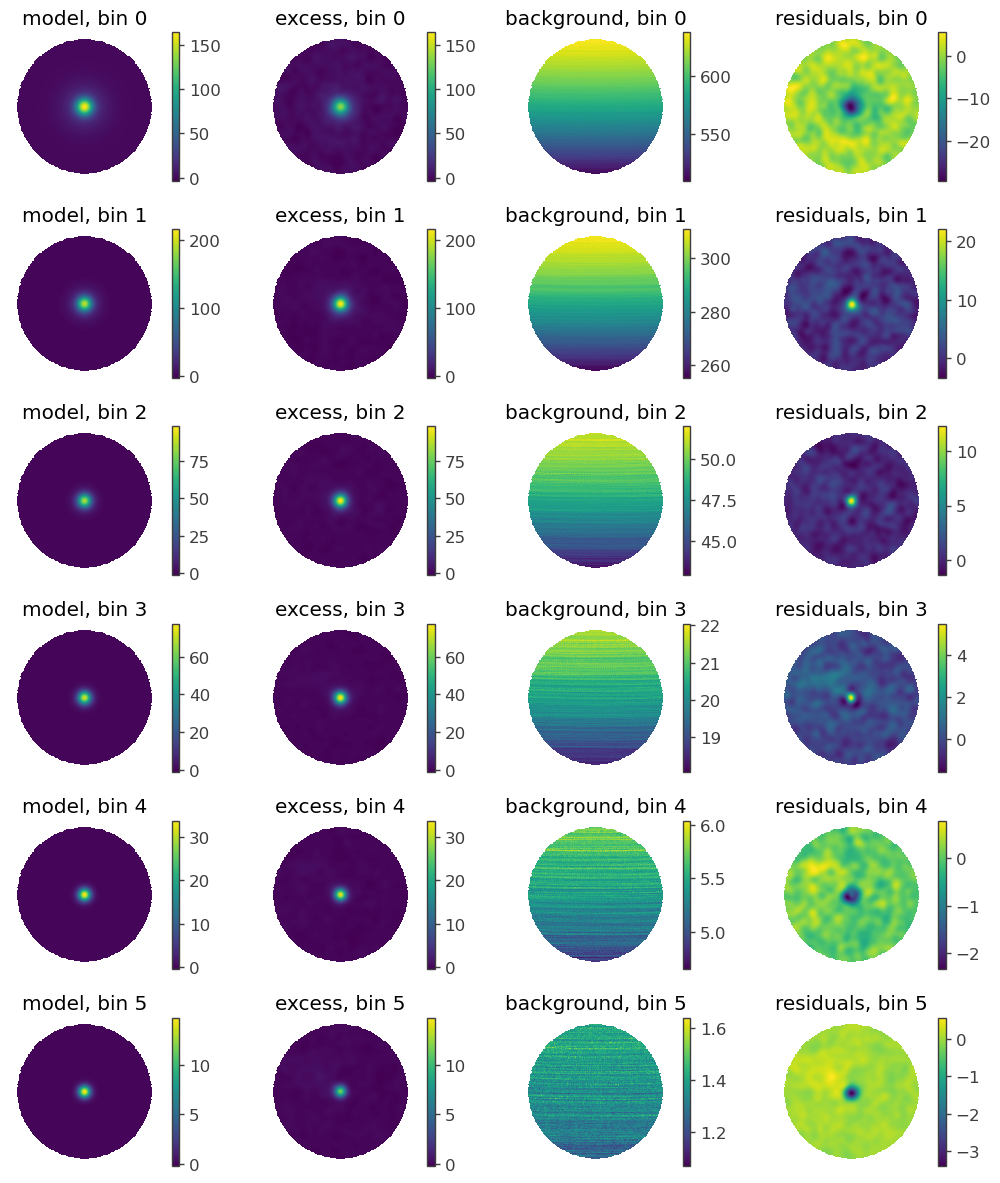

In [4]:
# Attempt the fitting; it will take approximately two minutes.
result = my.fit(region_name, Modelname, WCDA, lm, 0, 5, mini="minuit")
sources = my.get_sources(lm,result)
result[1][0]
# result[0].get_contours(J0248.Gaussian_on_sphere.lon0,39.88,44.88,30)

In [5]:
# Compute Ts,  it will take approximately five minutes.
TSlist = ["crab"] # A list put the sources that you want to compute TS
TS = {}
for sc in tqdm(TSlist):
    TS[sc]=result[0].compute_TS(sc,result[1][1]).values[0][2]
llh = WCDA.get_log_like()
TS_all = WCDA.cal_TS_all()
TS["TS_all"] = TS_all
TS["-log(likelihood)"] = -llh
TSresults = pd.DataFrame([TS])
TSresults.to_csv(f'../res/{region_name}/{Modelname}/Results.txt', sep='\t', mode='a', index=False)
TSresults

12:09:55 INFO      set the minimizer to minuit                                             ]8;id=66172;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=60815;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=543099;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=742132;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

100%|██████████| 1/1 [00:00<00:00, 17.17it/s]


,crab,TS_all,-log(likelihood)
0,124436.460353,124435.76722,38081.019906


In [12]:
reload(my)

Yourlib init successful!!!


<module 'mylib' from '/home/lhaaso/caowy/Public/3MLWCDAv0.9/Standard/src/mylib/__init__.py'>

83.62874999999998 22.01236111111111 Crab
83.63291666666665 22.0145 Crab Pulsar
82.21774999999998 22.00111111111111 J0528+2200
83.63320833333333 22.01447222222222 J0534+2200
83.62916666666665 22.016666666666666 G184.6-05.8


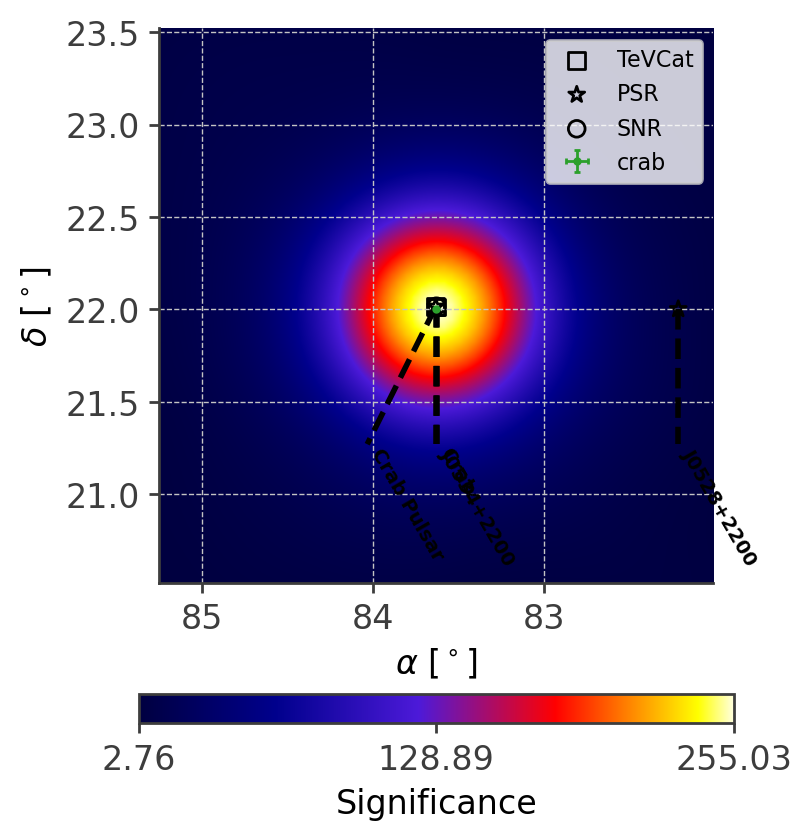

In [13]:
%matplotlib inline
sources = my.get_sources(lm,result)

map2, skymapHeader = hp.read_map("../../data/signif_20210305_20230731_ihep_goodlist_nHit006_0.29.fits.gz.fits.gz",h=True)
map2 = hp.ma(map2)
fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=3, contours=[1000],save=True)
# radx= 10; rady = 10
# ymax = dec1+rady/2
# ymin = dec1-rady/2
# xmin = ra1-radx/2
# xmax = ra1+radx/2
# my.Drawcat(xmin,xmax,ymin,ymax,"4FGL","^","black",60,label="4FGL",textlabel=True)
# my.Drawcat(xmin,xmax,ymin,ymax,"QSO",">","black",60,label="QSO",textlabel=True)
# my.Drawcat(xmin,xmax,ymin,ymax,"Simbad",".","black",90,fontsize=3,label="AGN",stype="AGN",textlabel=False)
# There are many catalog, you can find it in my souce code.
plt.legend()

In [15]:
#About 5 min
smoothsigma=[0.4123, 0.3111, 0.2476, 0.2064, 0.1633, 0.1379, 0.2896, 0.2594, 0.2152, 0.189, 0.1561, 0.14]#The first six bins are normal, and the following ones are merged bins, representing the total (merged), without the first bin, and without the first two bins, respectively.
maps = my.getmap(WCDA,roi,"Crab",modelindex=[1,0], # modelindex: pt and ext number
                #    stack=[1.000927,1.000286,1.002131,1.005977,1.002093,1.004078],
                   stack=[0, 0, 1.002131,1.005977,1.002093,1.004078], #Combine bins with nhit >= 200 based on signal-to-noise ratio.
                   smoothsigma=smoothsigma
                   )
smapall = my.smoothmap(maps[-1], smooth_sigma=0.2896)

100%|██████████| 23950/23950 [00:00<00:00, 54162.54it/s]


Mask all


100%|██████████| 23950/23950 [00:00<00:00, 45067.97it/s]


Mask all


100%|██████████| 23950/23950 [00:00<00:00, 36802.68it/s]


Mask all


100%|██████████| 23950/23950 [00:00<00:00, 38963.80it/s]


Mask all


100%|██████████| 23950/23950 [00:00<00:00, 45015.81it/s]


Mask all


100%|██████████| 23950/23950 [00:00<00:00, 43424.10it/s]


Mask all


100%|██████████| 23950/23950 [00:00<00:00, 180291.87it/s]


Smooth Sig
Smooth bkg
Smooth Modelbkg
Mask all


100%|██████████| 5/5 [00:00<00:00,  5.40it/s]


************************
[1.34206873e+03 2.06868016e-01 1.16525686e+00]
************************
max Significance= 7.9
80.43749999999999 21.214277777777777 VER J0521+211
83.62874999999998 22.01236111111111 Crab
83.63291666666665 22.0145 Crab Pulsar
85.77999999999999 23.4 HAWC J0543+233
79.29166666666666 22.266666666666666 J0517+22
82.21774999999998 22.00111111111111 J0528+2200
83.63320833333333 22.01447222222222 J0534+2200
85.79025 23.484722222222224 J0543+2329
86.61983333333332 24.689166666666665 J0546+2441
83.62916666666665 22.016666666666666 G184.6-05.8


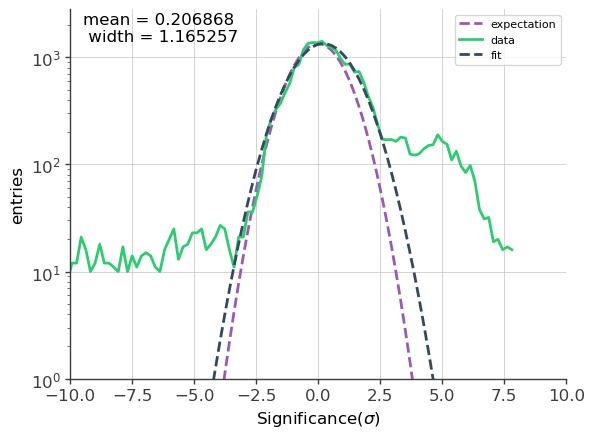

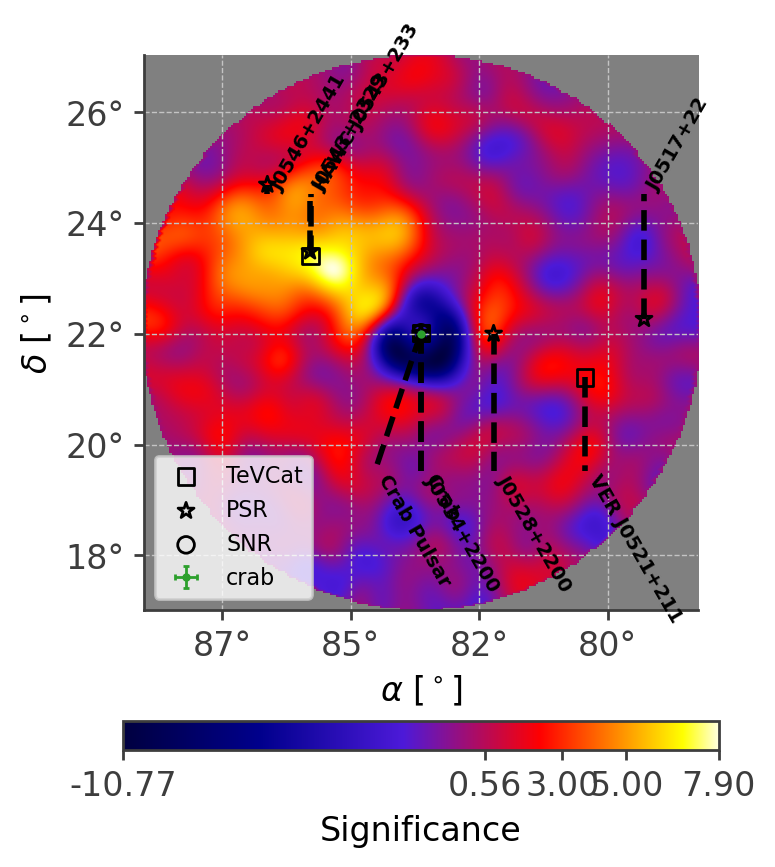

In [22]:
%matplotlib inline
res=True # Do you want resmap? or org map.
saven = "Significance"
if res:
    saven+="_res"
sigmap = my.getsigmap(region_name, Modelname, [smapall],i=0,signif=17,res=res,name="J0248")
fig = my.drawmap(region_name, Modelname, sources, sigmap, ra1, dec1, rad=10, contours=[100],save=True,savename=saven)
#There is another source around crab, so you can try another model: 1pt+1gaus maybe?

In [17]:
# If you want to get residual llh map, you need a new rootfile.
my.write_resmap(region_name, Modelname, WCDA, roi, maptree, 
ra1, dec1, "J0248resall_DGE_cdiff",
[0],[] #point source and ext source, if you have 3pt and 2 ext, and you only want sig about pt1, then use [1,0,0],[0, 0], or you only want 2nd ext: [0,0,0],[0,1]
)
# ! The file you got need use Add_UserInfo.cc in ./tools/llh_skymap to add UserInfo

processing at nHit0 0


100%|██████████| 95570/95570 [00:04<00:00, 21241.36it/s]


processing at nHit0 1


100%|██████████| 95570/95570 [00:03<00:00, 24685.96it/s]


processing at nHit0 2


100%|██████████| 95570/95570 [00:04<00:00, 23343.55it/s]


processing at nHit0 3


100%|██████████| 95570/95570 [00:03<00:00, 27008.66it/s]


processing at nHit0 4


100%|██████████| 95570/95570 [00:04<00:00, 23038.53it/s]


processing at nHit0 5


100%|██████████| 95570/95570 [00:04<00:00, 20781.95it/s]


In [19]:
Flux_WCDA = my.getdatapoint(WCDA, lm, maptree, response, roi, "crab")


WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



12:33:37 INFO      set the minimizer to minuit                                             ]8;id=386879;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=967794;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=225779;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=122713;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Powerlaw.K,(1.764 +/- 0.020) x 10^-21,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,6739.706941
total,6739.706941


Values of statistical measures:

,statistical measures
AIC,13481.413910
BIC,13491.289365



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



12:33:38 INFO      set the minimizer to minuit                                             ]8;id=253355;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=131703;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=54512;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=197795;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Powerlaw.K,(2.352 +/- 0.016) x 10^-21,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,6652.779722
total,6652.779722


Values of statistical measures:

,statistical measures
AIC,13307.559473
BIC,13317.434928



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



12:33:40 INFO      set the minimizer to minuit                                             ]8;id=293886;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=353871;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=87088;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=171595;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Powerlaw.K,(2.397 +/- 0.020) x 10^-21,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,6359.286875
total,6359.286875


Values of statistical measures:

,statistical measures
AIC,12720.573777
BIC,12730.449232



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



12:33:42 INFO      set the minimizer to minuit                                             ]8;id=933190;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=48714;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=875324;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=491097;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Powerlaw.K,(2.251 +/- 0.020) x 10^-21,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,6302.457247
total,6302.457247


Values of statistical measures:

,statistical measures
AIC,12606.914522
BIC,12616.789977



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



12:33:43 INFO      set the minimizer to minuit                                             ]8;id=526466;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=923235;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=96921;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=61758;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Powerlaw.K,(1.964 +/- 0.028) x 10^-21,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,6056.538982
total,6056.538982


Values of statistical measures:

,statistical measures
AIC,12115.077992
BIC,12124.953447



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



12:33:45 INFO      set the minimizer to minuit                                             ]8;id=366743;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=769646;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=71305;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=985945;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Powerlaw.K,(1.63 +/- 0.04) x 10^-21,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,5519.457159
total,5519.457159


Values of statistical measures:

,statistical measures
AIC,11040.914346
BIC,11050.789801


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

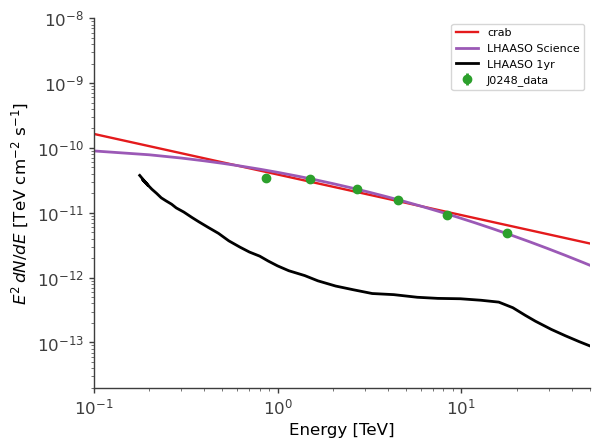

In [21]:
%matplotlib inline
x_Max=50.
x_Min=.1
y_Min=0.2e-13
y_Max=1e-8
fig,ax = plt.subplots()
plot_spectra(
    result[0].results,
    sources_to_use=["crab"],
    include_extended=True,
    ene_min=x_Min,
    ene_max=x_Max,
    num_ene=30,
    energy_unit="TeV",
    flux_unit="TeV/(s cm2)",
    subplot=ax
    )

my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA,"J0248_data","tab:green")

e_J0248=np.linspace(x_Min,x_Max,500)
flux_J0248_sci=e_J0248**2*8.2e-14*pow(e_J0248/10,-2.9-0.19*np.log10(e_J0248/10))
plt.plot(e_J0248,flux_J0248_sci,label='LHAASO Science')

LHAASO_sensitivity = np.genfromtxt("./LHAASO_sensitivity.csv",delimiter=',')
plt.plot(LHAASO_sensitivity[:,0],LHAASO_sensitivity[:,1]*1e-11,label="LHAASO 1yr", c="black")

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
plt.legend()
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')